In [1]:
import yt
import ytree
import h5py
import numpy as np
from matplotlib import pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/akohler22/.config/yt/ytrc is deprecated in favor of /Users/akohler22/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
a = ytree.load("trees/tree_0_0_0.dat")
print(a.field_list)

Additional features and improved performance (usually) by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("trees/tree_0_0_0.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)
['scale', 'id', 'desc_scale', 'desc_id', 'num_prog', 'pid', 'upid', 'desc_pid', 'phantom', 'sam_Mvir', 'Mvir', 'Rvir', 'rs', 'vrms', 'mmp?', 'scale_of_last_MM', 'vmax', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'Spin', 'Breadth_first_ID', 'Depth_first_ID', 'Tree_root_ID', 'Orig_halo_ID', 'Snap_idx', 'Next_coprogenitor_depthfirst_ID', 'Last_progenitor_depthfirst_ID', 'Last_mainleaf_depthfirst_ID', 'Tidal_Force', 'Tidal_ID', 'Rs_Klypin', 'Mvir_all', 'M200b', 'M200c', 'M500c', 'M2500c', 'Xoff', 'Voff', 'Spin_Bullock', 'b_to_a', 'c_to_a', 'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', 'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'T/|U|', 'M_pe_Behroozi', 'M_pe_Diemer', 'Type', 'SM', 'Gas', 'BH_Mass']


In [3]:
p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': 'LR', 'size': '"12,4"'})
p.save('tree.png')

Loading tree roots: 100%|██████████| 7934216/7934216 [00:00<00:00, 158792748.58it/s]


'tree.png'

In [4]:
filename = "galaxy_properties/halodata/halodat_DD0125.hdf5"
with h5py.File(filename, "r") as f:
    print(f.keys())
    print(len(f['id'][:]))

<KeysViewHDF5 ['avg_metallicity', 'gas_fraction', 'id', 'num_pop3', 'position', 'radius', 'stellar_mass', 'time', 'total_mass']>
264


In [5]:
prog = list(a[0].find_root()['prog', 'Orig_halo_ID'])
print(prog)

prog_m = a[0].find_root()['prog', 'mass']
print(prog_m)

print("Len: "+str(len(prog)))

[97, 175, 98, 103, 100, 105, 95, 95, 88, 99, 124, 99, 96, 96, 86, 94, 95, 95, 100, 94, 93, 95, 69, 96, 105, 74, 96, 93, 96, 97, 96, 90, 38, 120, 89, 94, 38, 37, 185, 74, 73, 162, 73, 88, 93, 97, 94, 90, 86, 85, 85, 85, 74, 82, 160, 71, 87, 84, 43, 82, 199, 37, 38, 36, 40, 30, 36, 34, 30, 21, 13, 104, 198, 110, 109, 108, 98, 80, 99, 77, 39, 71, 31, 31, 16, 24, 33, 25, 29, 4, 14, 17]
[79470880.  78717110.  77992904.  77239140.  76603610.  76041976.
 75347330.  74815250.  74460536.  74209280.  73810220.  73425950.
 73086020.  72746080.  72332250.  71415900.  70913390.  71268104.
 70292640.  70558670.  70130060.  69686664.  69361510.  69051140.
 68563410.  68208690.  67853976.  67381020.  66952410.  66509016.
 66080400.  65415310.  64898020.  64365948.  63479160.  63360920.
 62740172.  61986400.  61217852.  60523204.  59828550.  58971330.
 57966300.  57094296.  56325744.  55350280.  54552172.  53059416.
 52187410.  45654744.  46290276.  43038724.  39181200.  36476500.
 34688148.  32929352.

In [6]:
#Inspecting halo properties with match/no match
ytree_ids = list(a[0].find_root()['prog', 'Orig_halo_ID'])
ytree_masses = list(a[0].find_root()['prog', 'mass'])

for o in [125,124,123]:
    fname = "galaxy_properties/halodata/halodat_DD0"+"{:03d}".format(o)+".hdf5"
    with h5py.File(fname, "r") as f:
        print(o)
        hdf5_mass = f['total_mass'][ytree_id]
        hdf5_id = f['id'][ytree_id]

125


NameError: name 'ytree_id' is not defined

In [169]:
ytree_ids = list(a[0].find_root()['prog', 'Orig_halo_ID'])
ytree_masses = list(a[0].find_root()['prog', 'mass'])

output = 125
for ytree_id,ytree_mass in zip(ytree_ids,ytree_masses):
#     try:
    filename = "galaxy_properties/halodata/halodat_DD0"+"{:03d}".format(output)+".hdf5"
    with h5py.File(filename, "r") as f:
        hdf5_index = np.where(f['id'],ytree_id)
        hdf5_mass = f['total_mass'][hdf5_index]

        hdf5_max_id = list(np.where(f['total_mass'][:]==np.max(f['total_mass']))[0])[0]
        hdf5_max_mass = f['total_mass'][np.array([hdf5_max_id])][0]

        print('Output '+str(output))
        print('\tYtree ID: '+str(ytree_id)+'\n\tTrue HDF5 ID: '+str(hdf5_max_id))
        print('\tYtree Mass: '+str(ytree_mass)+'\n\tHDF5 index '+str(ytree_id)+' Mass: '+str(hdf5_mass), '\n\tHDF5 index '+str(hdf5_max_id)+' Mass: '+str(hdf5_max_mass))

#     except:
#         print('Output '+str(output)+': ytree id not found in hdf5')
    
    output = output - 1

Output 125
	Ytree ID: 97
	True HDF5 ID: 97
	Ytree Mass: 79470880.0 Msun
	HDF5 index 97 Mass: 79473880.0 
	HDF5 index 97 Mass: 79473880.0
Output 124
	Ytree ID: 175
	True HDF5 ID: 101
	Ytree Mass: 78717110.0 Msun
	HDF5 index 175 Mass: 1165156.8 
	HDF5 index 101 Mass: 78717624.0
Output 123
	Ytree ID: 98
	True HDF5 ID: 98
	Ytree Mass: 77992904.0 Msun
	HDF5 index 98 Mass: 77987170.0 
	HDF5 index 98 Mass: 77987170.0
Output 122
	Ytree ID: 103
	True HDF5 ID: 103
	Ytree Mass: 77239140.0 Msun
	HDF5 index 103 Mass: 77236860.0 
	HDF5 index 103 Mass: 77236860.0
Output 121
	Ytree ID: 100
	True HDF5 ID: 100
	Ytree Mass: 76603610.0 Msun
	HDF5 index 100 Mass: 76599700.0 
	HDF5 index 100 Mass: 76599700.0
Output 120
	Ytree ID: 105
	True HDF5 ID: 105
	Ytree Mass: 76041976.0 Msun
	HDF5 index 105 Mass: 76037960.0 
	HDF5 index 105 Mass: 76037960.0
Output 119
	Ytree ID: 95
	True HDF5 ID: 95
	Ytree Mass: 75347330.0 Msun
	HDF5 index 95 Mass: 75339260.0 
	HDF5 index 95 Mass: 75339260.0
Output 118
	Ytree ID: 95
	

IndexError: Index (198) out of range for (0-140)

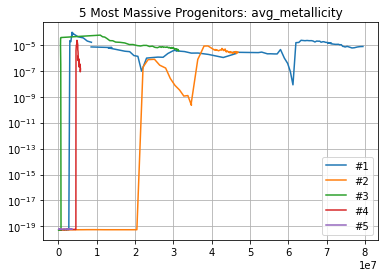

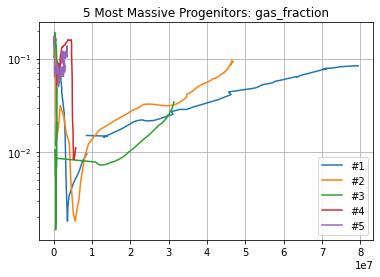

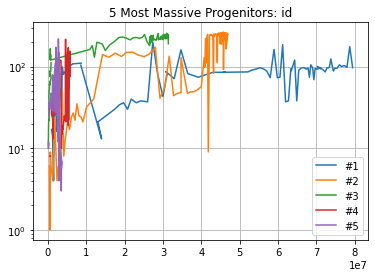

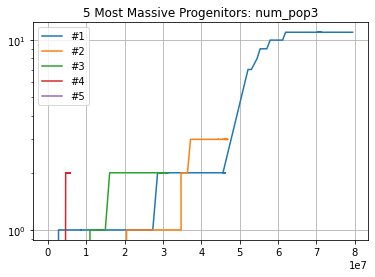

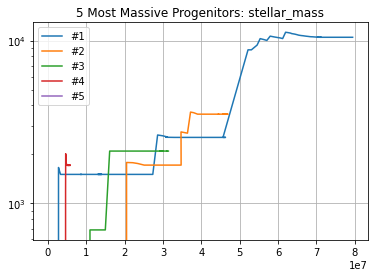

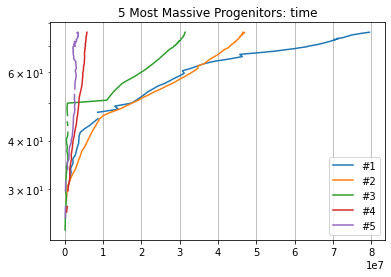

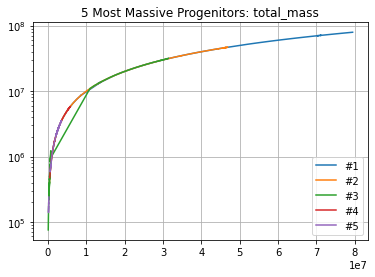

In [50]:
for halo_property in ['avg_metallicity', 'gas_fraction', 'id', 'num_pop3', 'stellar_mass', 'time', 'total_mass']:
    for i in range(5):

        prog = list(a[i].find_root()['prog', 'Orig_halo_ID'])
    #     print(np.flip(prog))
    #     print(len(np.flip(prog)))
    #     print(prog)

        prog_mass = list(a[i].find_root()['prog', 'mass'])
    #     print(np.flip(np.array(prog_mass)))
        prog_masses = np.flip(np.array(prog_mass))
    #     print(len(prog_masses))

        halo_propertys = []
        halo_ids = []
        outputs = []
        output = 125
        for halo_id in prog:
            try:
                filename = "galaxy_properties/halodata/halodat_DD0"+"{:03d}".format(output)+".hdf5"
                with h5py.File(filename, "r") as f:
#                     print('Halo ID, according to ytree: '+str(halo_id))
                    hdf5_index = np.where(f['id'][:]==halo_id)[0][0]
#                     print('Index of halo with that ID in HDF5: '+str(hdf5_index))
#                     print('Halo ID, according to HDF5: '+str(f['id'][hdf5_index]))
                    halo_propertys.append(f[halo_property][hdf5_index])
                    halo_ids.append(f['id'][hdf5_index])
#                     print(output)
#                     print(f['id'][:])

                outputs.append(output)
                output = output-1
            except:
                halo_propertys.append(np.nan)
                halo_ids.append(np.nan)

                outputs.append(output)
                output = output-1
        halo_propertys = np.flip(np.array(halo_propertys))

        outputs = np.flip(np.array(outputs))

#         plt.plot(outputs, halo_propertys, label="halo "+halo_property)
#         plt.title("#"+str(i+1)+" Most Massive Progenitor: "+halo_property)
#         plt.legend()
#         plt.grid()
#         plt.savefig("properties_evolution/"+halo_property+"/"+halo_property+'_'+str(i+1))

#         plt.plot(outputs, halo_propertys, label="#"+str(i+1))
        plt.plot(prog_masses, halo_propertys, label="#"+str(i+1))

#         with h5py.File("halo_properties.hdf5", 'r+') as f:
#             f.create_dataset(halo_property+"_"+str(i), data=halo_propertys)
#         f.close()

    plt.title("5 Most Massive Progenitors: "+halo_property)
    plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.savefig("properties_evolution/"+halo_property+"/"+halo_property+"_top5")

    plt.show()

In [34]:
def my_node(halo):
    prog = list(halo.find_root()['prog', 'uid'])
    if halo['uid'] in prog:
        color = 'red'
    else:
        color = 'black'
        
#     if halo['uid'] == 26720:
#         print(halo['Orig_halo_ID'])

    label = \
    """
    id: %d
    Orig id: %d
    mass: %.2e Msun
    """ % (halo['uid'], halo['Orig_halo_ID'], halo['mass'].to('Msun'))

    my_kwargs = {"label": label, "fontsize": 8,
                 "shape": "square", "color": color}
    return my_kwargs
p = ytree.TreePlot(a[0], dot_kwargs={'rankdir': "LR"}, node_function=my_node)
p.save('tree_custom_nodes_1st.png')

print(halo_masses)

[ 170703.515625  138944.734375  194522.625          0.
       0.        190552.765625  202462.3125    240175.890625
       0.             0.        716560.75      756259.25
  583570.8125   1048044.6875   1103624.       1119503.375
 1246538.625    1625660.75     1720938.625    1965085.75
 2036543.125    2119910.       2175489.25     2215187.75
 2252901.25     2290615.       2562551.       2612174.25
 2540717.       2657827.5      2518882.75     2526822.5
 2520867.75           0.       2626068.75     2657827.5
 2663782.25     2717376.75     2890065.       2975417.
 2886095.25     2733256.       3011147.       2947628.
 2870215.75     2824562.5      2316419.       2336268.25
 2209233.       2221142.5      2121894.75     2225112.5
 2239006.75     2239006.75     2177474.25     2195338.5
 2195338.5      2113955.25     2090136.       2113955.25
 2117925.       2133804.5      2272750.5      2735241.
 2757075.25     2763030.       2274735.5      2373981.75
 2423604.75     2429559.75     2804713

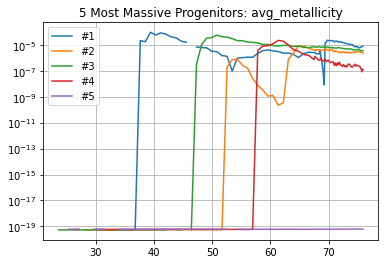

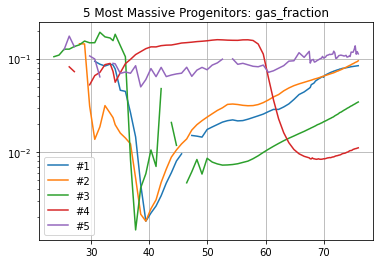

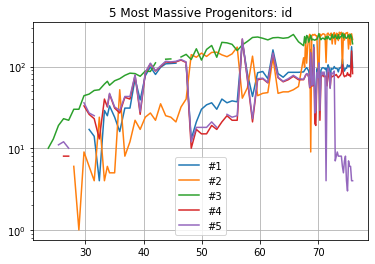

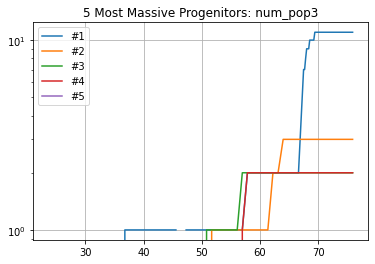

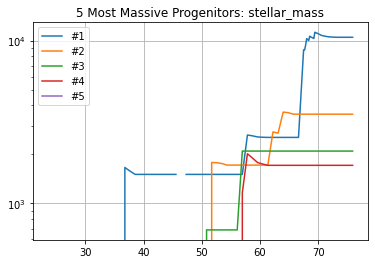

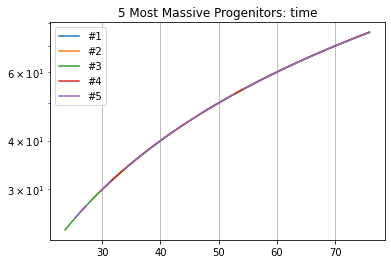

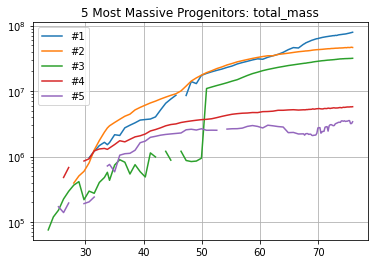

In [21]:
x_axis = 'time'
with h5py.File("halo_properties.hdf5","w") as f:
    for halo_property in ['avg_metallicity', 'gas_fraction', 'id', 'num_pop3', 'stellar_mass', 'time', 'total_mass']:
        for i in range(5):

            prog = list(a[i].find_root()['prog', 'Orig_halo_ID'])
        #     print(np.flip(prog))
        #     print(len(np.flip(prog)))
        #     print(prog)

            prog_mass = list(a[i].find_root()['prog', 'mass'])
        #     print(np.flip(np.array(prog_mass)))
            prog_masses = np.flip(np.array(prog_mass))
        #     print(len(prog_masses))

            halo_propertys = []
            halo_xs = []
            halo_ids = []
            outputs = []
            output = 125
            for halo_id in prog:
                try:
                    filename = "galaxy_properties/halodata/halodat_DD0"+"{:03d}".format(output)+".hdf5"
                    with h5py.File(filename, "r") as f:
    #                     print('Halo ID, according to ytree: '+str(halo_id))
                        hdf5_index = np.where(f['id'][:]==halo_id)[0][0]
    #                     print('Index of halo with that ID in HDF5: '+str(hdf5_index))
    #                     print('Halo ID, according to HDF5: '+str(f['id'][hdf5_index]))
                        halo_propertys.append(f[halo_property][hdf5_index])
                        halo_xs.append(f[x_axis][hdf5_index])
                        halo_ids.append(f['id'][hdf5_index])
    #                     print(output)
    #                     print(f['id'][:])

                    outputs.append(output)
                    output = output-1
                except:
                    halo_propertys.append(np.nan)
                    halo_ids.append(np.nan)
                    halo_xs.append(np.nan)

                    outputs.append(output)
                    output = output-1
            halo_propertys = np.flip(np.array(halo_propertys))

            outputs = np.flip(np.array(outputs))
            halo_xs = np.flip(np.array(halo_xs))

    #         plt.plot(outputs, halo_propertys, label="halo "+halo_property)
    #         plt.title("#"+str(i+1)+" Most Massive Progenitor: "+halo_property)
    #         plt.legend()
    #         plt.grid()
    #         plt.savefig("properties_evolution/"+halo_property+"/"+halo_property+'_'+str(i+1))

            plt.plot(halo_xs, halo_propertys, label="#"+str(i+1))
        
#             print(halo_propertys)
#             h_p = f.create_dataset(halo_property+"_"+str(i), data=halo_propertys, dtype='f')
        
        plt.title("5 Most Massive Progenitors: "+halo_property)
        plt.legend()
        plt.yscale('log')
        plt.grid()
        plt.savefig("properties_evolution/"+halo_property+"/"+halo_property+"_"+x_axis+"_top5")

        plt.show()
f.close()